In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 

from keras import layers
from keras import models
from keras import backend as K
from keras import callbacks
from keras import optimizers
from keras.regularizers import l2
import pickle
import tensorflow as tf

2024-03-10 10:58:05.154433: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6fa5c/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-c1d8e/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib

In [2]:
import pickle

signal = pd.read_csv('signal_CSCOnly_240510.csv')

pu = pd.read_csv('pu_CSCOnly_240510.csv')
dy = pd.read_csv('dy_CSCOnly_240510.csv')
pions_kaons = pd.read_csv('pions_kaons_CSCOnly_240510.csv')
beam_halo = pd.read_csv('beam_halo_CSCOnly_240510.csv')

train_csc = pd.concat([signal, pu, dy, pions_kaons, beam_halo], axis=0)

del  signal, pu,dy,pions_kaons, beam_halo

In [3]:
train_csc.shape

(474855, 22)

In [4]:
train_csc

,Unnamed: 0,Cluster_XSpread,Cluster_YSpread,Cluster_ZSpread,Cluster_XYSpread,Cluster_RSpread,Cluster_SkewX,Cluster_SkewY,Cluster_SkewZ,Cluster_KurtX,...,frac_s1,frac_s2,frac_s3,frac_s4,frac_rw1,frac_rw2,frac_rw3,Cluster_Size,y,weight
0,5,18.097641,27.872089,0.047985,13.252828,16.398750,-2.355558,-10.489044,-0.013916,-0.063755,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,64,1,0.002090
1,6,31.040527,18.928686,30.312361,14.992152,32.267048,-17.488033,11.488912,55.564621,-0.254372,...,0.000000,0.837838,0.162162,0.000000,0.0,1.000000,0.000000,333,1,0.005323
2,11,25.771738,45.267792,52.418896,12.181660,44.798634,18.220913,86.644836,-120.445091,0.121282,...,0.000000,0.862745,0.109804,0.027451,0.0,1.000000,0.000000,255,1,0.004396
3,31,22.737541,23.012917,0.033677,9.930502,24.948252,-1.825027,-2.568240,0.001441,-0.421570,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,248,1,0.004323
4,33,33.718040,25.260181,44.089489,5.617549,33.620945,6.964221,-43.769653,167.441162,-1.358159,...,0.000000,0.938144,0.030928,0.030928,0.0,1.000000,0.000000,194,1,0.003786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,9998149,12.120682,4.033607,117.960884,6.304285,12.569423,26.069159,6.265519,31.535727,7.009489,...,0.436364,0.218182,0.218182,0.127273,0.0,0.563636,0.436364,55,0,0.001189
39716,9998537,100.277237,26.417229,4.836966,48.588280,103.057770,0.856878,3.109254,22.878077,-1.374234,...,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,304,0,0.047352
39717,9999110,45.356262,18.395401,0.020963,16.921047,45.934376,-46.622551,16.197115,-0.019509,0.466967,...,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,185,0,0.011755
39718,9999150,71.777931,9.386246,0.042740,8.109658,71.800270,9.521962,3.881446,-0.010378,-0.194425,...,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,246,0,0.014441


(array([127054.,  66663.,  50067.,  42978.,  41367.,  35626.,  31724.,
         28615.,  26380.,  24381.]),
 array([ 50.,  85., 120., 155., 190., 225., 260., 295., 330., 365., 400.]),
 <BarContainer object of 10 artists>)

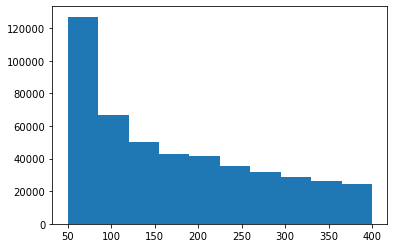

In [5]:
import matplotlib.pyplot as plt

plt.hist(train_csc.Cluster_Size)

In [6]:
flat_df = train_csc
flat_df = flat_df.sample(frac = 1) #shuffle


In [7]:
flat_df["Cluster_Size"] = pd.to_numeric(flat_df["Cluster_Size"])
flat_df["y"] = pd.to_numeric(flat_df["y"])
flat_df["weight"] = pd.to_numeric(flat_df["weight"])

flat_df.dtypes

Unnamed: 0            int64
Cluster_XSpread     float64
Cluster_YSpread     float64
Cluster_ZSpread     float64
Cluster_XYSpread    float64
Cluster_RSpread     float64
Cluster_SkewX       float64
Cluster_SkewY       float64
Cluster_SkewZ       float64
Cluster_KurtX       float64
Cluster_KurtY       float64
Cluster_KurtZ       float64
frac_s1             float64
frac_s2             float64
frac_s3             float64
frac_s4             float64
frac_rw1            float64
frac_rw2            float64
frac_rw3            float64
Cluster_Size          int64
y                     int64
weight              float64
dtype: object

In [8]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

In [9]:
print('signal: ',equalObs(flat_df[(flat_df.y == 1)].Cluster_Size, 10))
print('bkg: ',equalObs(flat_df[(flat_df.y == 0)].Cluster_Size, 10))
print('ratio:', (equalObs(flat_df[(flat_df.y == 1)].Cluster_Size, 10) + equalObs(flat_df[(flat_df.y == 0)].Cluster_Size, 10))/2)

signal:  [ 50.  68.  90. 116. 146. 178. 214. 253. 297. 345. 400.]
bkg:  [ 50.  52.  55.  59.  65.  72.  82. 100. 130. 204. 400.]
ratio: [ 50.   60.   72.5  87.5 105.5 125.  148.  176.5 213.5 274.5 400. ]


In [10]:
def make_groups(x):
    if x >= 50 and x < 75:
        return 0
    elif x >= 75 and x < 100:
        return 1
    elif x >= 100 and x < 125:
        return 2
    elif x >= 125 and x < 150:
        return 3
    elif x >= 150 and x < 175:
        return 4
    elif x >= 175 and x < 200:
        return 5
    elif x >= 200 and x < 225:
        return 6
    elif x >= 225 and x < 250:
        return 7
    elif x >= 250 and x < 275:
        return 8
    elif x >= 275 and x < 300:
        return 9
    elif x >= 300 and x < 325:
        return 10
    elif x >= 325 and x < 350:
        return 11
    elif x >= 350 and x < 375:
        return 12
    elif x >= 375 and x <= 400:
        return 13
    
groups = flat_df['Cluster_Size'].apply(make_groups)



In [10]:
def make_groups(x):
    if x >= 50 and x < 70:
        return 0
    elif x >= 70 and x < 90:
        return 1
    elif x >= 90 and x < 110:
        return 2
    elif x >= 110 and x < 130:
        return 3
    elif x >= 130 and x < 150:
        return 4
    elif x >= 150 and x < 170:
        return 5
    elif x >= 170 and x < 190:
        return 6
    elif x >= 190 and x < 210:
        return 7
    elif x >= 210 and x < 230:
        return 8
    elif x >= 230 and x < 250:
        return 9
    elif x >= 250 and x < 270:
        return 10
    elif x >= 270 and x < 290:
        return 11
    elif x >= 290 and x < 310:
        return 12
    elif x >= 310 and x < 330:
        return 13
    elif x >= 330 and x < 350:
        return 14
    elif x >= 350 and x < 370:
        return 15
    elif x >= 370 and x <= 400:
        return 16

groups = flat_df['Cluster_Size'].apply(make_groups)

In [11]:
groups = tf.keras.utils.to_categorical(groups)


In [15]:
#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_KurtX', 'Cluster_KurtY', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']

# option1:
#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_XYSpread', 'Cluster_RSpread','Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']

# option2:
#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']
# option3:
variablesTrain = ['Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size']
#variablesTrain = ['Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size']



>>> Plotting Cluster_XSpread histogram...
0 200


<Figure size 432x288 with 0 Axes>

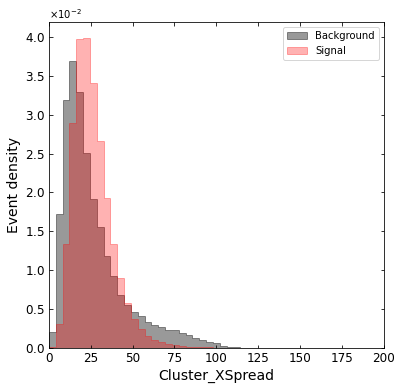

    Done
>>> Plotting Cluster_YSpread histogram...
0 200


<Figure size 432x288 with 0 Axes>

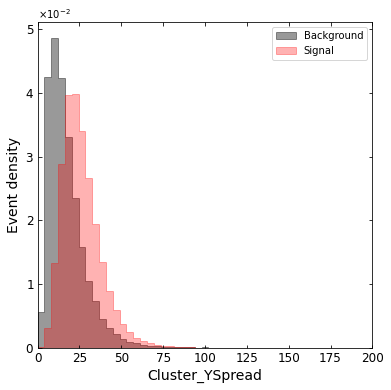

    Done
>>> Plotting Cluster_ZSpread histogram...
0 200


<Figure size 432x288 with 0 Axes>

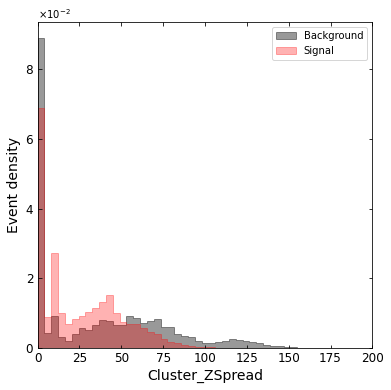

    Done
>>> Plotting Cluster_XYSpread histogram...
0 130


<Figure size 432x288 with 0 Axes>

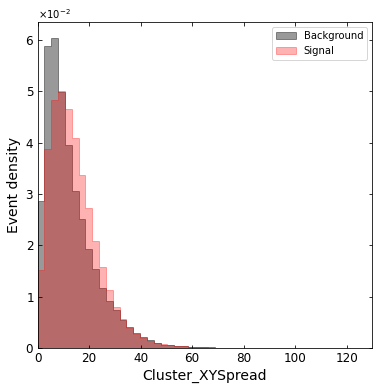

    Done
>>> Plotting Cluster_RSpread histogram...
0 130


<Figure size 432x288 with 0 Axes>

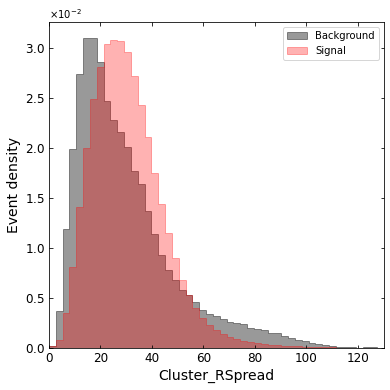

    Done
>>> Plotting Cluster_SkewX histogram...
0 340.5431396484


<Figure size 432x288 with 0 Axes>

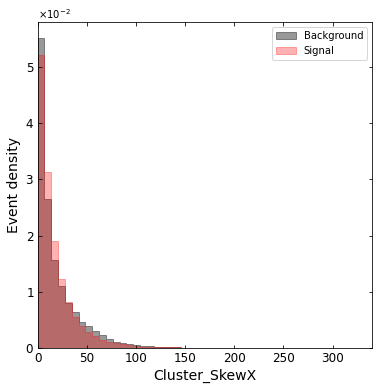

    Done
>>> Plotting Cluster_SkewY histogram...
0 376.1938842768


<Figure size 432x288 with 0 Axes>

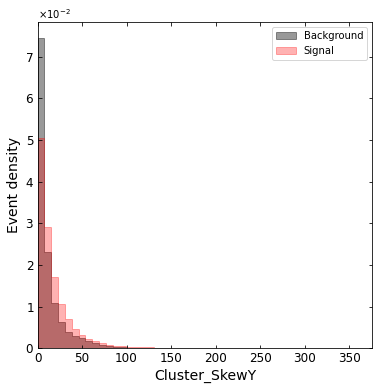

    Done
>>> Plotting frac_s1 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

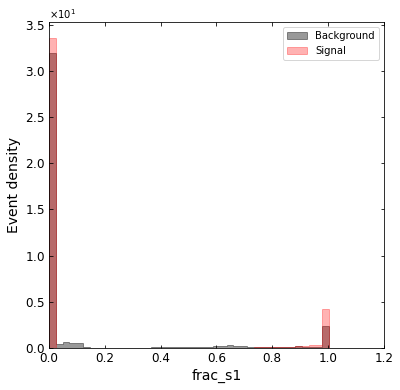

    Done
>>> Plotting frac_s2 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

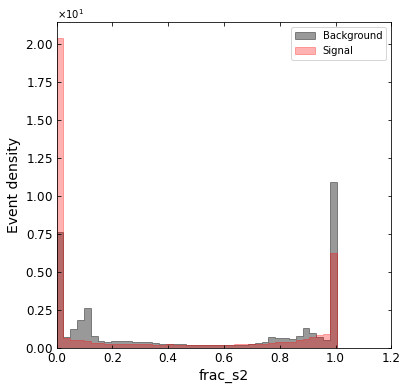

    Done
>>> Plotting frac_s3 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

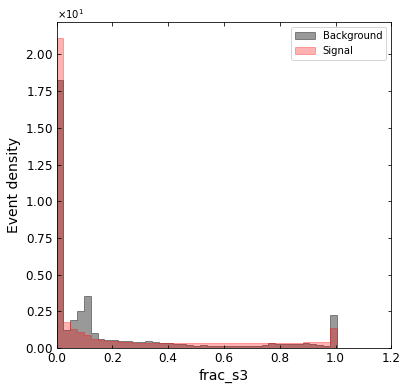

    Done
>>> Plotting frac_s4 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

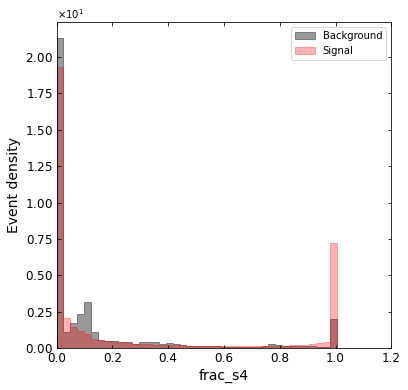

    Done
>>> Plotting frac_rw1 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

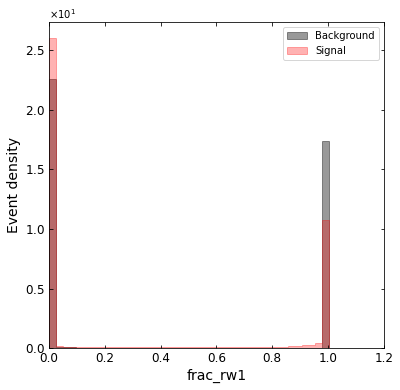

    Done
>>> Plotting frac_rw2 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

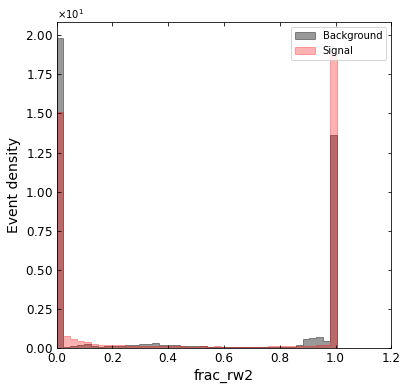

    Done
>>> Plotting frac_rw3 histogram...
0 1.2


<Figure size 432x288 with 0 Axes>

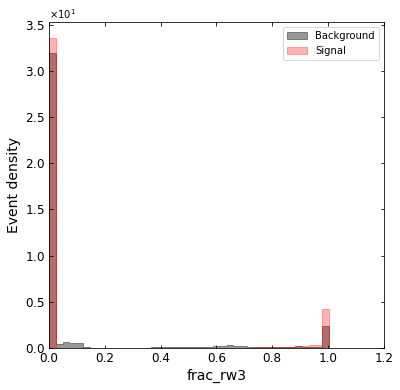

    Done
>>> Plotting Cluster_Size histogram...
0 480.0


<Figure size 432x288 with 0 Axes>

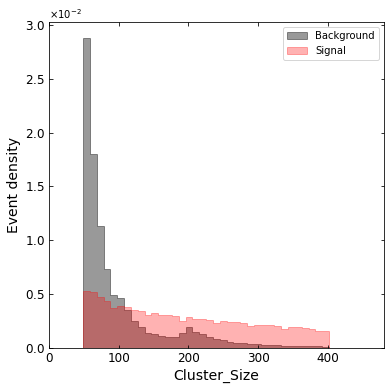

    Done


In [16]:
import matplotlib.pyplot as plt

for feature in variablesTrain:
    
    print(">>> Plotting " + feature + " histogram...")

    # Define the histogram binning
    xmin = 0
    #xmin = bkg_sel_test_Dt[feature].dropna().values.min()
    xmax = 1.2*flat_df[(flat_df.y == 0)][feature].dropna().values.max()


    # same x-axis
    if 'Cluster_XSpread' in feature:
        xmax = 200
    elif 'Cluster_YSpread' in feature:
        xmax = 200
    elif 'Cluster_ZSpread' in feature:
        xmax = 200
    elif 'Cluster_XYSpread' in feature:
        xmax = 130
    elif 'Cluster_RSpread' in feature:
        xmax = 130
        
    binning = np.linspace(xmin, xmax, 50) 
    print(xmin,xmax)
    
    # Plot and save the histogram
    plt.clf()
    fig = plt.figure(figsize =(6,6))
    ax = fig.add_subplot(111)
    ax.margins(x = 0)
    
    ax.hist(flat_df[(flat_df.y == 0)][feature].values, bins = binning, color = 'k', alpha = 0.4, histtype = 'stepfilled', 
             linewidth = 1, edgecolor = 'k', label = 'Background', density = True)
    ax.hist(flat_df[(flat_df.y == 1)][feature].values, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', 
             linewidth = 1, edgecolor = 'r', label = 'Signal', density = True)
    ax.legend(loc = 'best', fontsize = 10)
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('Event density', fontsize = 14)
    ax.tick_params(axis='both', which='both', direction='in', 
                   bottom=True, top=True, left=True, right=True, labelsize=12)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
    fig.savefig('Plots_presentation_PlusbeamHalo/CSC_'+feature+'.png', dpi = 600)
    plt.show()
          
    print("    Done")

In [17]:
import keras.backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy, CategoricalCrossentropy, categorical_crossentropy
import numpy as np



K.clear_session()

# Some random training data
#features = np.asarray(flat_df[variablesTrain[:-3]]).astype(np.float32)
features = flat_df[variablesTrain[:-1]]

# Architecture:
input_layer = Input((flat_df[variablesTrain[:-1]].shape[1],))
dense_1 = Dense(64, activation='relu')(input_layer)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(32, activation='relu')(dense_2)
dense_4 = Dense(16, activation='relu')(dense_3)
dense_5 = Dense(8, activation='relu')(dense_4)
classifier_1 = Dense(1, activation='sigmoid')(dense_5)
classifier_2 = Dense(groups.shape[1], activation='sigmoid',trainable=False)(classifier_1)

#dense_6 = Dense(8, activation='tanh',trainable=False)(classifier_1)
#dense_7 = Dense(8, activation='tanh',trainable=False)(dense_6)
#dense_8 = Dense(16, activation='tanh',trainable=False)(dense_7)
#classifier_2 = Dense(groups.shape[1], activation='sigmoid',trainable=False)(dense_8)

# Two additional 'inputs' for the labels
label_layer_1 = Input((1,))
label_layer_2 = Input((groups.shape[1],))

# Instantiate model, pass label layers as inputs
model = Model(inputs=[input_layer, label_layer_1, label_layer_2], outputs=[classifier_1])

# Construct custom loss
#loss = (binary_crossentropy(label_layer_1, classifier_1) / (5.0 * categorical_crossentropy(label_layer_2, classifier_2, from_logits=True)))

loss = (binary_crossentropy(label_layer_1, classifier_1) - 20.*categorical_crossentropy(label_layer_2, classifier_2))
#loss = (binary_crossentropy(label_layer_1, classifier_1) / 2*categorical_crossentropy(label_layer_2, classifier_2))

# Add loss to model
model.add_loss(loss)

# Compile without specifying a loss
model.compile(optimizer=tf.optimizers.Adam(0.0005), metrics=['accuracy',])
#model.compile(optimizer=tf.optimizers.Adam(0.0005), weighted_metrics=['accuracy',])


model.summary()
#history = model.fit([features, np.asarray(flat_df['y']).astype(np.int64), groups], np.asarray(flat_df['y']).astype(np.int64), shuffle=True,  batch_size=2000, validation_split=0.1, epochs=500, verbose=1, callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=30,verbose=1)])
history = model.fit([features, flat_df['y'], groups], flat_df['y'], shuffle=True, sample_weight=flat_df['weight'], validation_split=0.1, epochs=1000, batch_size=2000, verbose=1, callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=30,verbose=1)])
#history = model.fit([features, flat_df['y'], groups], flat_df['y'], shuffle=True, validation_split=0.1, epochs=700, batch_size=2000, verbose=1, callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=30,verbose=1)])




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           960         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

Epoch 21/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9472 - accuracy: 0.8055 - val_loss: -57.9540 - val_accuracy: 0.8058
Epoch 22/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9488 - accuracy: 0.8055 - val_loss: -57.9520 - val_accuracy: 0.8037
Epoch 23/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9497 - accuracy: 0.8054 - val_loss: -57.9542 - val_accuracy: 0.8064
Epoch 24/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9506 - accuracy: 0.8058 - val_loss: -57.9560 - val_accuracy: 0.8068
Epoch 25/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9518 - accuracy: 0.8054 - val_loss: -57.9554 - val_accuracy: 0.8071
Epoch 26/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9523 - accuracy: 0.8054 - val_loss: -57.9566 - val_accuracy: 0.8070
Epoch 27/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9539 - accuracy: 0.8056 -

Epoch 76/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9706 - accuracy: 0.8062 - val_loss: -57.9659 - val_accuracy: 0.8067
Epoch 77/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9704 - accuracy: 0.8061 - val_loss: -57.9661 - val_accuracy: 0.8090
Epoch 78/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9711 - accuracy: 0.8064 - val_loss: -57.9665 - val_accuracy: 0.8071
Epoch 79/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9717 - accuracy: 0.8062 - val_loss: -57.9692 - val_accuracy: 0.8065
Epoch 80/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9707 - accuracy: 0.8062 - val_loss: -57.9666 - val_accuracy: 0.8069
Epoch 81/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9720 - accuracy: 0.8063 - val_loss: -57.9680 - val_accuracy: 0.8080
Epoch 82/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9720 - accuracy: 0.8065 -

Epoch 131/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9801 - accuracy: 0.8070 - val_loss: -57.9742 - val_accuracy: 0.8071
Epoch 132/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9804 - accuracy: 0.8070 - val_loss: -57.9698 - val_accuracy: 0.8091
Epoch 133/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9800 - accuracy: 0.8071 - val_loss: -57.9725 - val_accuracy: 0.8078
Epoch 134/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9811 - accuracy: 0.8070 - val_loss: -57.9747 - val_accuracy: 0.8066
Epoch 135/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9804 - accuracy: 0.8070 - val_loss: -57.9717 - val_accuracy: 0.8051
Epoch 136/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9814 - accuracy: 0.8071 - val_loss: -57.9721 - val_accuracy: 0.8062
Epoch 137/1000
214/214 [==============================] - 1s 7ms/step - loss: -57.9808 - accuracy: 0

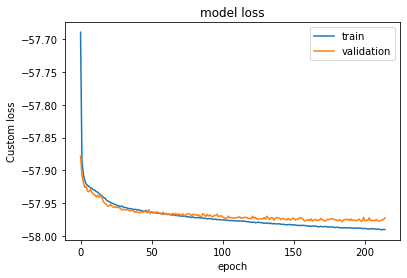

In [18]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Custom loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.savefig('Plots_presentation_PlusbeamHalo/model_loss.png')

plt.show()

In [19]:
#flat_df = flat_df.dropna()

#flat_df = flat_df.sample(frac = 1)

import keras.backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy, CategoricalCrossentropy, categorical_crossentropy
import numpy as np

K.clear_session()

# Some random training data
#features = np.asarray(flat_df[variablesTrain[:-3]]).astype(np.float32)
features = flat_df[variablesTrain[:-1]]

# Architecture:
input_layer = Input((flat_df[variablesTrain[:-1]].shape[1],))
dense_1 = Dense(64, activation='relu')(input_layer)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(32, activation='relu')(dense_2)
dense_4 = Dense(16, activation='relu')(dense_3)
dense_5 = Dense(8, activation='relu')(dense_4)
classifier_1 = Dense(1, activation='sigmoid')(dense_5)

# Two additional 'inputs' for the labels
label_layer_1 = Input((1,))
label_layer_2 = Input((groups.shape[1],))

# Instantiate model, pass label layers as inputs
model_2 = Model(inputs=[input_layer, label_layer_1, label_layer_2], outputs=[classifier_1])

# Construct custom loss
loss_2 = (binary_crossentropy(label_layer_1, classifier_1))

# Add loss to model
model_2.add_loss(loss_2)

# Compile without specifying a loss
model_2.compile(optimizer=tf.optimizers.Adam(0.0005), metrics=['accuracy'])

model_2.summary()
history_2 = model_2.fit([features, flat_df['y'], flat_df['Cluster_Size']], flat_df['y'], sample_weight=flat_df['weight'], shuffle=True, validation_split=0.1, epochs=1000, batch_size=2000, verbose=1, callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=30,verbose=1)])




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           960         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

Epoch 26/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2802 - accuracy: 0.8844 - val_loss: 0.2864 - val_accuracy: 0.8819
Epoch 27/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2795 - accuracy: 0.8845 - val_loss: 0.2862 - val_accuracy: 0.8813
Epoch 28/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2793 - accuracy: 0.8845 - val_loss: 0.2852 - val_accuracy: 0.8821
Epoch 29/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2786 - accuracy: 0.8846 - val_loss: 0.2867 - val_accuracy: 0.8807
Epoch 30/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2785 - accuracy: 0.8850 - val_loss: 0.2831 - val_accuracy: 0.8833
Epoch 31/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2778 - accuracy: 0.8849 - val_loss: 0.2865 - val_accuracy: 0.8811
Epoch 32/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2774 - accuracy: 0.8852 - val_loss: 0.2834 - val_ac

214/214 [==============================] - 1s 6ms/step - loss: 0.2561 - accuracy: 0.8959 - val_loss: 0.2675 - val_accuracy: 0.8925
Epoch 139/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2555 - accuracy: 0.8965 - val_loss: 0.2682 - val_accuracy: 0.8925
Epoch 140/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2551 - accuracy: 0.8967 - val_loss: 0.2666 - val_accuracy: 0.8936
Epoch 141/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2543 - accuracy: 0.8972 - val_loss: 0.2682 - val_accuracy: 0.8927
Epoch 142/1000
214/214 [==============================] - 2s 8ms/step - loss: 0.2540 - accuracy: 0.8975 - val_loss: 0.2658 - val_accuracy: 0.8933
Epoch 143/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2530 - accuracy: 0.8978 - val_loss: 0.2639 - val_accuracy: 0.8952
Epoch 144/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2519 - accuracy: 0.8990 - val_loss: 0.2623 - val_accuracy: 

214/214 [==============================] - 1s 6ms/step - loss: 0.2195 - accuracy: 0.9142 - val_loss: 0.2351 - val_accuracy: 0.9080
Epoch 251/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2195 - accuracy: 0.9141 - val_loss: 0.2362 - val_accuracy: 0.9084
Epoch 252/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2200 - accuracy: 0.9138 - val_loss: 0.2381 - val_accuracy: 0.9064
Epoch 253/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2194 - accuracy: 0.9142 - val_loss: 0.2357 - val_accuracy: 0.9081
Epoch 254/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2192 - accuracy: 0.9145 - val_loss: 0.2341 - val_accuracy: 0.9085
Epoch 255/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2190 - accuracy: 0.9145 - val_loss: 0.2355 - val_accuracy: 0.9077
Epoch 256/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2192 - accuracy: 0.9142 - val_loss: 0.2354 - val_accuracy: 

214/214 [==============================] - 1s 6ms/step - loss: 0.2120 - accuracy: 0.9174 - val_loss: 0.2313 - val_accuracy: 0.9124
Epoch 363/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2124 - accuracy: 0.9170 - val_loss: 0.2335 - val_accuracy: 0.9112
Epoch 364/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2118 - accuracy: 0.9175 - val_loss: 0.2313 - val_accuracy: 0.9117
Epoch 365/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2114 - accuracy: 0.9173 - val_loss: 0.2322 - val_accuracy: 0.9107
Epoch 366/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2119 - accuracy: 0.9175 - val_loss: 0.2329 - val_accuracy: 0.9108
Epoch 367/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2122 - accuracy: 0.9171 - val_loss: 0.2355 - val_accuracy: 0.9102
Epoch 368/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2117 - accuracy: 0.9176 - val_loss: 0.2323 - val_accuracy: 

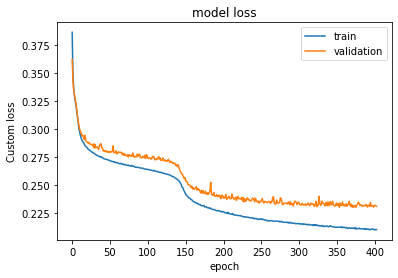

In [20]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Custom loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig('Plots_presentation_PlusbeamHalo/model_loss_noAdversarial.png')

plt.show()

In [19]:
features.columns

Index(['Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread',
       'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY',
       'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2',
       'frac_rw3'],
      dtype='object')

In [20]:
flat_df[variablesTrain[:-1]].shape[1]

14

<function matplotlib.pyplot.show(close=None, block=None)>

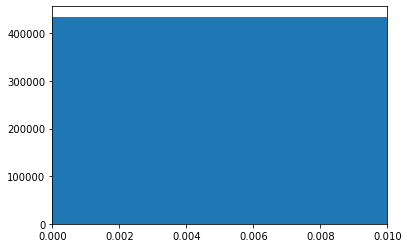

In [21]:
plt.hist(flat_df['weight'], bins=50)
plt.xlim([0, 0.01])
plt.show

(array([16578.67, 14697.77, 13370.95, 12753.27, 12402.91, 11879.76,
        11993.19, 11912.01, 12176.4 , 12495.26, 12329.22, 12530.55,
        13107.6 , 13121.89, 13298.68, 13720.22, 13840.08, 14128.87,
        14480.01, 14433.51, 14883.65, 15378.76, 15023.98, 15494.02,
        15642.92, 15650.47, 15923.72, 16290.5 , 16513.2 , 16440.55,
        16734.59, 17059.49, 17015.47, 16872.78, 16870.36, 17184.88,
        17069.63, 17547.94, 17782.46, 17337.4 , 17472.52, 17789.68,
        17877.42, 18035.22, 18269.16, 17627.3 , 17728.32, 17701.87,
        17769.24, 20639.  ]),
 array([ 50.,  57.,  64.,  71.,  78.,  85.,  92.,  99., 106., 113., 120.,
        127., 134., 141., 148., 155., 162., 169., 176., 183., 190., 197.,
        204., 211., 218., 225., 232., 239., 246., 253., 260., 267., 274.,
        281., 288., 295., 302., 309., 316., 323., 330., 337., 344., 351.,
        358., 365., 372., 379., 386., 393., 400.]),
 <BarContainer object of 50 artists>)

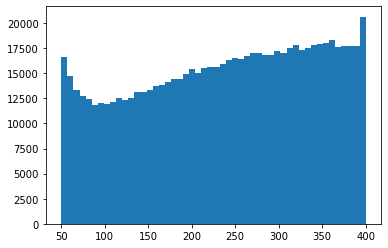

In [22]:
plt.hist(flat_df["Cluster_Size"], bins=50, weights = 0.01*flat_df["Cluster_Size"])


(array([31367., 24561., 19981., 17261., 15326., 13507., 12635., 11681.,
        11174., 10777., 10023.,  9643.,  9570.,  9115.,  8809.,  8686.,
         8387.,  8215.,  8090.,  7762.,  7711.,  7689.,  7259.,  7241.,
         7079.,  6866.,  6776.,  6732.,  6632.,  6423.,  6363.,  6318.,
         6143.,  5941.,  5799.,  5767.,  5596.,  5624.,  5575.,  5318.,
         5248.,  5232.,  5152.,  5095.,  5061.,  4790.,  4728.,  4634.,
         4568.,  5205.]),
 array([ 50.,  57.,  64.,  71.,  78.,  85.,  92.,  99., 106., 113., 120.,
        127., 134., 141., 148., 155., 162., 169., 176., 183., 190., 197.,
        204., 211., 218., 225., 232., 239., 246., 253., 260., 267., 274.,
        281., 288., 295., 302., 309., 316., 323., 330., 337., 344., 351.,
        358., 365., 372., 379., 386., 393., 400.]),
 <BarContainer object of 50 artists>)

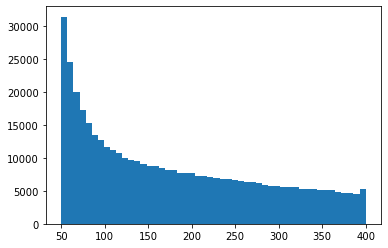

In [23]:
plt.hist(flat_df["Cluster_Size"], bins=50)


In [24]:
flat_df['weight']

194005    0.001834
87720     0.002200
4752      0.003346
89283     0.002181
255178    0.002715
            ...   
5898      0.025596
332867    0.004638
36932     0.003250
1837      0.002050
37006     0.004635
Name: weight, Length: 435135, dtype: float64

In [21]:
import keras.backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy, CategoricalCrossentropy, categorical_crossentropy
import numpy as np


# for testing: only provide features

model_2 = Model(inputs=model_2.input[0],
                  outputs=model_2.get_layer("dense_5").output)



flat_df['DNN'] = model_2.predict(flat_df[variablesTrain[:-1]])

In [22]:
model_2.save('training_CA0p6_NoMerging_WeightedClusterSize_bkgMC_CSCOnly_PlusBeamHalo_240510.h5')

In [23]:
model.save('training_CA0p6_NoMerging_WeightedClusterSize_bkgMC_CSCOnly_adversarial_PlusBeamHalo_240510.h5')

In [24]:

import keras.backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy, CategoricalCrossentropy, categorical_crossentropy
import numpy as np

#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread','frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']
#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_KurtX', 'Cluster_KurtY', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']

#variablesTrain = ['Cluster_isCSC', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_Size', 'Cluster_nXY', 'Cluster_nZ']


model = Model(inputs=model.input[0],
                  outputs=model.get_layer("dense_5").output)

flat_df['DNN_adversarial'] = model.predict(flat_df[variablesTrain[:-1]])


In [25]:
flat_df.columns

Index(['Unnamed: 0', 'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread',
       'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', 'Cluster_SkewY',
       'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ',
       'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2',
       'frac_rw3', 'Cluster_Size', 'y', 'weight', 'DNN', 'DNN_adversarial'],
      dtype='object')

In [26]:
columns = ['Cluster_isCSC', 'Cluster_Size', 'Cluster_match_gLLP', 'Cluster_Time', 'Cluster_eta', 'Cluster_phi', 'Cluster_NRechitChamberPlus11', 'Cluster_NRechitChamberMinus11', 'Cluster_NRechitChamberPlus12', \
           'Cluster_NRechitChamberMinus12', 'Cluster_TimeSpread', 'Cluster_MuonVetoPt', 'Cluster_MuonVetoGlobal', 'Cluster_JetVetoLooseId', 'Cluster_JetVetoTightId', \
           'Cluster_JetVetoPt', 'Cluster_nXY', 'Cluster_nZ', \
           'Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_MajorAxis', 'Cluster_MinorAxis', \
           'Cluster_SkewX', 'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'Cluster_match_RPCBx_dPhi0p5', 'frac_s1', \
           'frac_s2', 'frac_s3', 'frac_s4', 'frac_rw1', 'frac_rw2', 'frac_rw3']

test = pd.read_csv('/eos/cms/store/group/phys_muon/fernanpe/displacedJetMuonAnalyzer_CA0p6_noMerging_240304_CSC/txtFiles_hadd/xaa', header = None, names=columns, sep='\t', index_col=False, na_values='NaN')

test["Cluster_match_gLLP"] = test["Cluster_match_gLLP"].astype(int)
test["Cluster_MuonVetoGlobal"] = test["Cluster_MuonVetoGlobal"].astype(int)
test["Cluster_JetVetoLooseId"] = test["Cluster_JetVetoLooseId"].astype(int)
test["Cluster_JetVetoTightId"] = test["Cluster_JetVetoTightId"].astype(int)
test['y'] = 0
test['weight'] = 1.0


# default
print('default', test.shape)

#OOT time
test = test[np.logical_or(test.Cluster_Time < -5.0, test.Cluster_Time > 12.5)]
print('test OOT showers: ', test.shape)

#ME11/12 veto
test = test[(test.Cluster_NRechitChamberPlus11 == 0) & (test.Cluster_NRechitChamberMinus11 == 0) & (test.Cluster_NRechitChamberPlus12 == 0) & (test.Cluster_NRechitChamberMinus12 == 0)]
print('test veto ME11/ME12: ', test.shape)

#Muon veto
test = test[(test.Cluster_MuonVetoGlobal == 0)]
print('test muon veto: ', test.shape)

#jet veto
test = test[(test.Cluster_JetVetoLooseId == 0)]
print('test jet veto: ', test.shape)

# no beamhalo
test = test[np.logical_or(test.Cluster_phi < -0.3, test.Cluster_phi > 0.3)]
print('test no beam halo: ', test.shape)

#clusterSize
test = test[(test.Cluster_Size > 200)]
print('test cluster size: ', test.shape)

columns = ['Cluster_XSpread', 'Cluster_YSpread', 'Cluster_ZSpread', 'Cluster_XYSpread', 'Cluster_RSpread', 'Cluster_SkewX', \
                  'Cluster_SkewY', 'Cluster_SkewZ', 'Cluster_KurtX', 'Cluster_KurtY', 'Cluster_KurtZ', 'frac_s1', 'frac_s2', 'frac_s3', 'frac_s4', \
                  'frac_rw1', 'frac_rw2', 'frac_rw3', 'Cluster_Size', 'y', 'weight']
test = test[columns]

default (10000000, 41)
test OOT showers:  (1430368, 41)
test veto ME11/ME12:  (355973, 41)
test muon veto:  (346729, 41)
test jet veto:  (321752, 41)
test no beam halo:  (274077, 41)
test cluster size:  (91688, 41)


In [31]:
test.y

58          0
250         0
257         0
284         0
501         0
           ..
14398746    0
14398779    0
14398844    0
14399098    0
14399161    0
Name: y, Length: 151861, dtype: int64

In [27]:
signal = pd.read_csv('signal_CSCOnly_240510.csv')
signal = signal[(signal.Cluster_Size > 200)]
test = pd.concat([signal, test], axis=0)
del signal

In [28]:
test.y

1          1
2          1
3          1
5          1
6          1
          ..
9999396    0
9999501    0
9999512    0
9999618    0
9999719    0
Name: y, Length: 255690, dtype: int64

In [29]:
#model = Model(inputs=model.input[0],
#                  outputs=model.get_layer("dense_5").output)

test['DNN_adversarial'] = model.predict(test[variablesTrain[:-1]])




In [30]:
#model_2 = Model(inputs=model_2.input[0],
#                  outputs=model_2.get_layer("dense_5").output)

test['DNN'] = model_2.predict(test[variablesTrain[:-1]])

<function matplotlib.pyplot.show(close=None, block=None)>

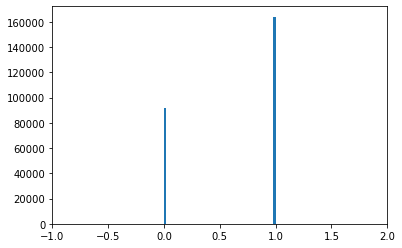

In [31]:
plt.hist(test['y'], bins=50)
plt.xlim([-1, 2])
plt.show

The optimal cut value is: 0.9242461


<Figure size 432x288 with 0 Axes>

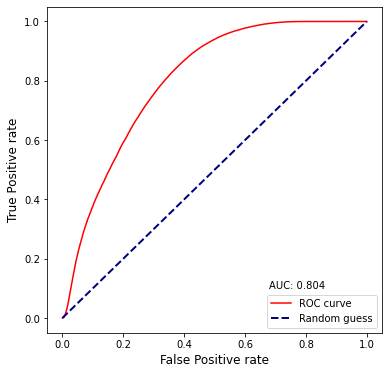

In [32]:
import os
from matplotlib import pyplot as plt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test['y'], test['DNN'])
auc = metrics.auc(fpr, tpr)

plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
plt.plot(fpr, tpr, color = 'r', label = "ROC curve")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random guess")
plt.legend(loc = "lower right")
plt.xlabel('False Positive rate', fontsize = 12)
plt.ylabel('True Positive rate', fontsize = 12)
plt.text(0.68, 0.1, 'AUC: %.3f' % auc)
#plt.savefig('Results_CA0p5_perCluster/ROC_NN.png', dpi =  600)


#### Optative and not explained (Youden index, cut value):
Youden_index = tpr - fpr
i_max = np.argmax(Youden_index)
cut_value = thresholds[i_max]

print("The optimal cut value is: " + str(cut_value))
plt.savefig('Plots_presentation_PlusbeamHalo/ROC_NN.png', dpi = 600)


The optimal cut value is: 0.96137905


<Figure size 432x288 with 0 Axes>

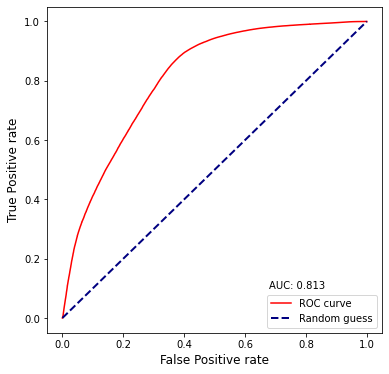

In [33]:
import os
from matplotlib import pyplot as plt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(test['y'], test['DNN_adversarial'])
auc = metrics.auc(fpr, tpr)

plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
plt.plot(fpr, tpr, color = 'r', label = "ROC curve")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random guess")
plt.legend(loc = "lower right")
plt.xlabel('False Positive rate', fontsize = 12)
plt.ylabel('True Positive rate', fontsize = 12)
plt.text(0.68, 0.1, 'AUC: %.3f' % auc)
#plt.savefig('Results_CA0p5_perCluster/ROC_NN.png', dpi =  600)


#### Optative and not explained (Youden index, cut value):
Youden_index = tpr - fpr
i_max = np.argmax(Youden_index)
cut_value = thresholds[i_max]

print("The optimal cut value is: " + str(cut_value))
plt.savefig('Plots_presentation_PlusbeamHalo/ROC_NNadversarial.png', dpi = 600)


[9.5624363e-01 4.1792719e-05 4.8195058e-01 ... 9.8441339e-01 8.9799774e-01
 2.8276145e-03]
[0.8437958  0.9917512  0.5821323  ... 0.99990445 0.9954008  0.9994068 ]


<Figure size 432x288 with 0 Axes>

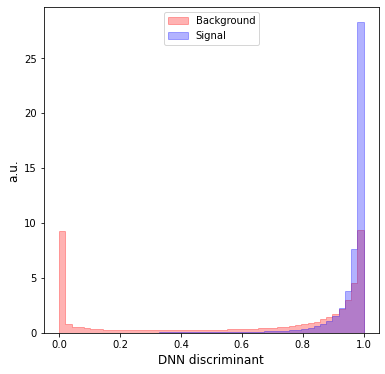

In [34]:
import os
from matplotlib import pyplot as plt

# Convert the y_pred and y_test numpy matrixes to 1-dimensional numpy arrays:
discriminant = np.squeeze(np.asarray(test['DNN']))
true_labels = np.squeeze(np.asarray(test['y']))

# Get the discriminant values for each class (0: background, 1: signal):
discriminant0 = discriminant[list(true_labels == 0)]
print(discriminant0)
discriminant1 = discriminant[list(true_labels == 1)]
print(discriminant1)

# Define the binning:
binning = np.linspace(0, 1, 50)


# Plot the discriminant distributions:
plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
pdf0, bins0, patches0 = plt.hist(discriminant0, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='r', label = 'Background', density=True)
pdf1, bins1, patches1 = plt.hist(discriminant1, bins = binning, color = 'b', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='b', label = 'Signal', density=True)
plt.legend(loc = 'upper center')
plt.ylabel('a.u.', fontsize = 12)
plt.xlabel('DNN discriminant', fontsize = 12)
#if not os.path.exists('Results_CA0p5_perCluster/'): os.makedirs('Results/')
#plt.savefig('Results_CA0p5_perCluster/DiscriminantNN_distribution.png', dpi = 600)
plt.savefig('Plots_presentation_PlusbeamHalo/DiscriminantNN_distribution.png', dpi = 600)

[0.97952974 0.00715974 0.8501693  ... 0.85162234 0.9948498  0.8744901 ]
[0.92456865 0.9943839  0.97238815 ... 0.99995804 0.99343145 0.9990995 ]


<Figure size 432x288 with 0 Axes>

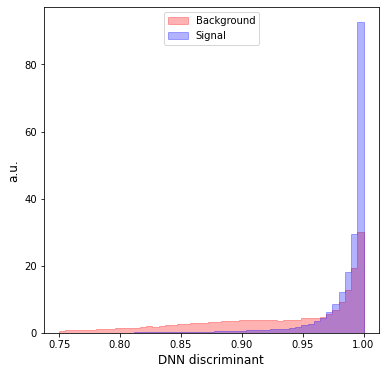

In [35]:
import os
from matplotlib import pyplot as plt

# Convert the y_pred and y_test numpy matrixes to 1-dimensional numpy arrays:
discriminant = np.squeeze(np.asarray(test['DNN_adversarial']))
true_labels = np.squeeze(np.asarray(test['y']))

# Get the discriminant values for each class (0: background, 1: signal):
discriminant0 = discriminant[list(true_labels == 0)]
print(discriminant0)
discriminant1 = discriminant[list(true_labels == 1)]
print(discriminant1)

# Define the binning:
binning = np.linspace(0.75, 1, 50)


# Plot the discriminant distributions:
plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
pdf0, bins0, patches0 = plt.hist(discriminant0, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='r', label = 'Background', density=True)
pdf1, bins1, patches1 = plt.hist(discriminant1, bins = binning, color = 'b', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='b', label = 'Signal', density=True)
plt.legend(loc = 'upper center')
plt.ylabel('a.u.', fontsize = 12)
plt.xlabel('DNN discriminant', fontsize = 12)
plt.savefig('Plots_presentation_PlusbeamHalo/DiscriminantNNadversarial_distribution.png', dpi = 600)

In [36]:

bkg_test = test[(test.y == 0)]
signal_test = test[(test.y == 1)]

bkg_train = flat_df[(flat_df.y == 0) & (flat_df.Cluster_Size > 200.)]
signal_train = flat_df[(flat_df.y == 1)]

In [37]:
bkg_test[['Cluster_Size', 'DNN_adversarial', 'DNN']].corr()

,Cluster_Size,DNN_adversarial,DNN
Cluster_Size,1.000000,-0.000932,0.177712
DNN_adversarial,-0.000932,1.000000,0.494699
DNN,0.177712,0.494699,1.000000


In [38]:
signal_test[['Cluster_Size', 'DNN_adversarial', 'DNN']].corr()

,Cluster_Size,DNN_adversarial,DNN
Cluster_Size,1.000000,0.034260,0.056991
DNN_adversarial,0.034260,1.000000,0.476921
DNN,0.056991,0.476921,1.000000


In [39]:
bkg_train[['Cluster_Size', 'DNN_adversarial', 'DNN']].corr()

,Cluster_Size,DNN_adversarial,DNN
Cluster_Size,1.000000,0.135047,0.187538
DNN_adversarial,0.135047,1.000000,0.766672
DNN,0.187538,0.766672,1.000000


In [40]:
signal_train[['Cluster_Size', 'DNN_adversarial', 'DNN']].corr()

,Cluster_Size,DNN_adversarial,DNN
Cluster_Size,1.000000,0.100595,0.189286
DNN_adversarial,0.100595,1.000000,0.514732
DNN,0.189286,0.514732,1.000000


In [41]:
selected = test[(test.DNN_adversarial > 0.96137905)]

signal_sel_test = selected[(selected.y == 1)]
bkg_sel_test = selected[(selected.y == 0)]




In [42]:
print('test bkg:', bkg_test.shape)
print('test sig:', signal_test.shape)

print('selected bkg:', bkg_sel_test.shape)
print('selected sig:', signal_sel_test.shape)

test bkg: (91688, 24)
test sig: (164002, 24)
selected bkg: (34967, 24)
selected sig: (144130, 24)


In [67]:
print(136407/164002)
print(72811/151861)


0.8317398568310143
0.47945818873838575


>>> Plotting Cluster_XSpread histogram...
5.64967727661 174.1083801264


<Figure size 432x288 with 0 Axes>

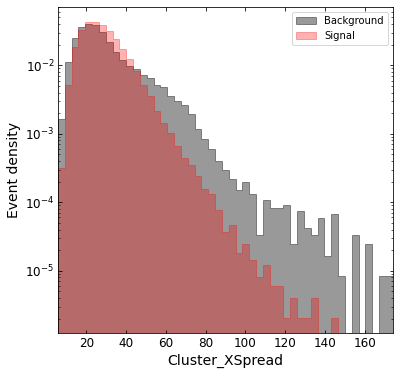

    Done
>>> Plotting Cluster_YSpread histogram...
7.73292589188 190.7102050776


<Figure size 432x288 with 0 Axes>

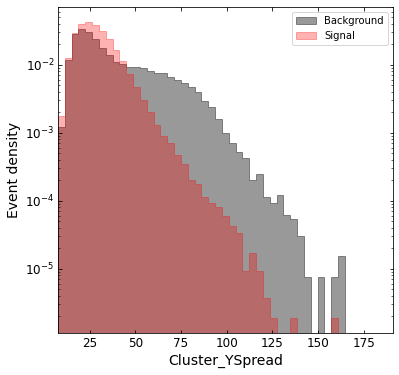

    Done
>>> Plotting Cluster_ZSpread histogram...
0.0011673681438 147.5645965572


<Figure size 432x288 with 0 Axes>

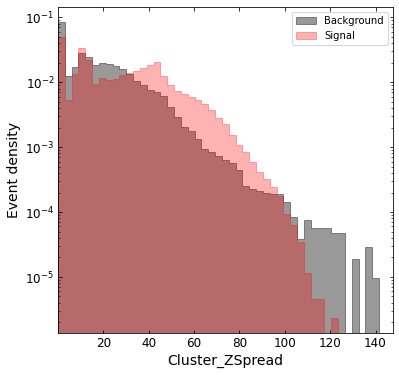

    Done
>>> Plotting Cluster_XYSpread histogram...
0.0827243030071 118.04919433595998


<Figure size 432x288 with 0 Axes>

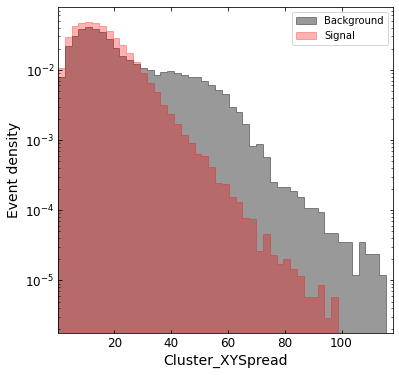

    Done
>>> Plotting Cluster_RSpread histogram...
8.3968038559 192.33213501


<Figure size 432x288 with 0 Axes>

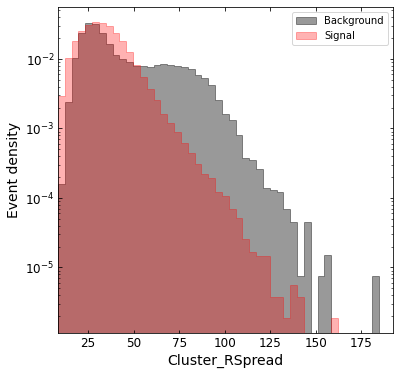

    Done
>>> Plotting Cluster_SkewX histogram...
-323.451568604 348.8370483396


<Figure size 432x288 with 0 Axes>

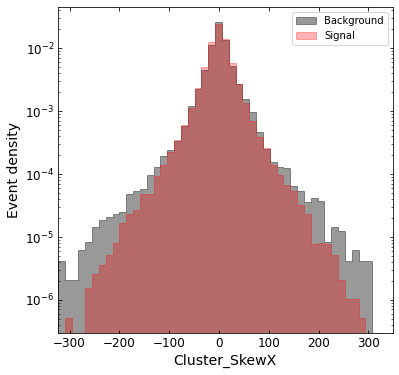

    Done
>>> Plotting Cluster_SkewY histogram...
-268.685211182 356.9580688476


<Figure size 432x288 with 0 Axes>

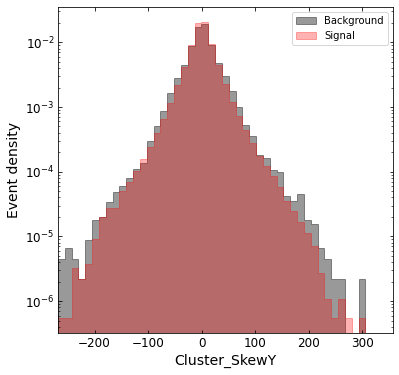

    Done
>>> Plotting frac_s1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

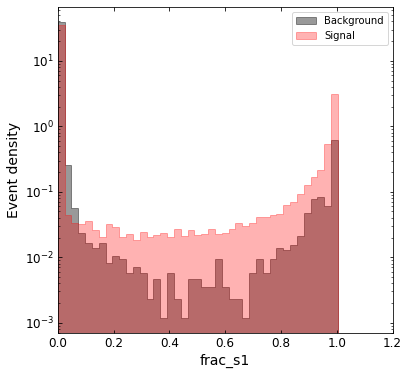

    Done
>>> Plotting frac_s2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

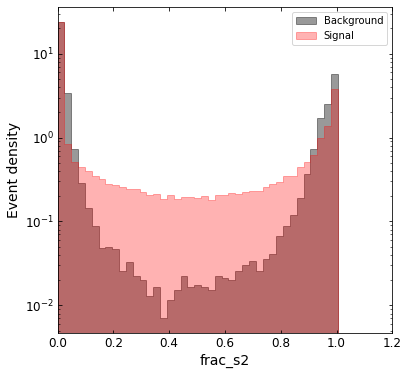

    Done
>>> Plotting frac_s3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

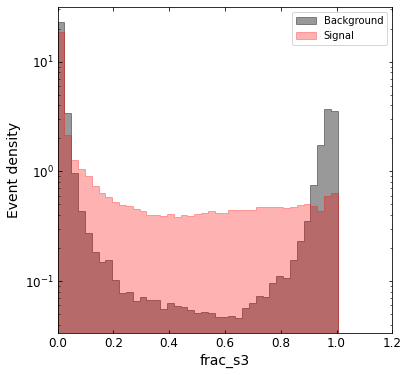

    Done
>>> Plotting frac_s4 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

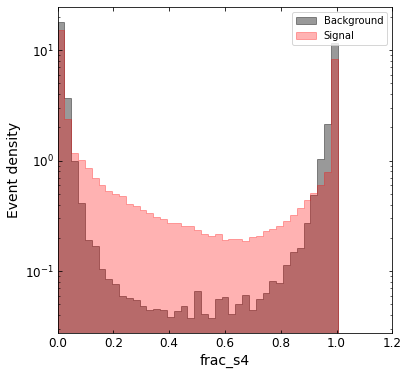

    Done
>>> Plotting frac_rw1 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

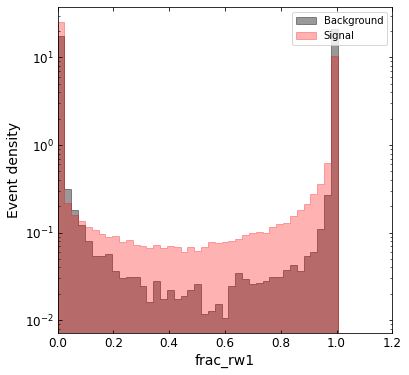

    Done
>>> Plotting frac_rw2 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

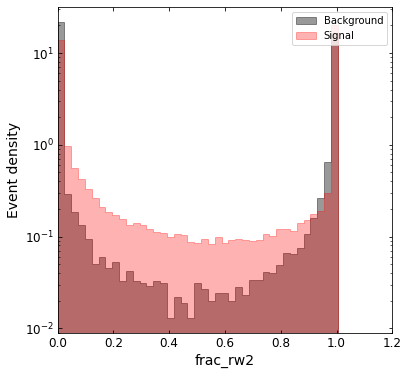

    Done
>>> Plotting frac_rw3 histogram...
0.0 1.2


<Figure size 432x288 with 0 Axes>

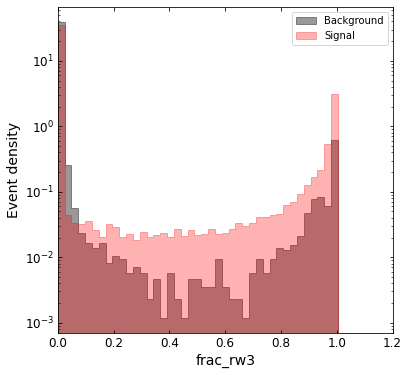

    Done
>>> Plotting Cluster_Size histogram...
201 480.0


<Figure size 432x288 with 0 Axes>

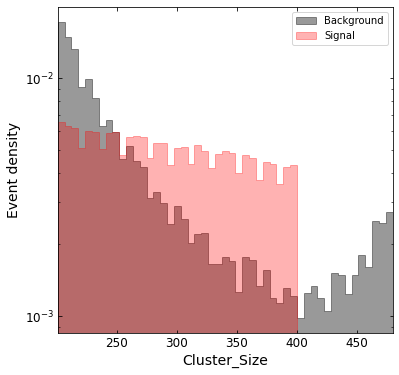

    Done


In [43]:
### Loop over the features
for feature in variablesTrain:
    
    print(">>> Plotting " + feature + " histogram...")

    # Define the histogram binning

    xmin = bkg_sel_test[feature].dropna().values.min()
    xmax = 1.2*signal_sel_test[feature].dropna().values.max()
    binning = np.linspace(xmin, xmax, 50) 
    print(xmin,xmax)
    
    # Plot and save the histogram
    plt.clf()
    fig = plt.figure(figsize =(6,6))
    ax = fig.add_subplot(111)
    ax.margins(x = 0)
    
    ax.hist(bkg_sel_test[feature].values, bins = binning, color = 'k', alpha = 0.4, histtype = 'stepfilled', 
             linewidth = 1, edgecolor = 'k', label = 'Background', density = True)
    ax.hist(signal_sel_test[feature].values, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', 
             linewidth = 1, edgecolor = 'r', label = 'Signal', density = True)
    ax.legend(loc = 'best', fontsize = 10)
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('Event density', fontsize = 14)
    ax.tick_params(axis='both', which='both', direction='in', 
                   bottom=True, top=True, left=True, right=True, labelsize=12)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText = True)
    plt.yscale('log')
    fig.savefig('Plots_presentation_PlusbeamHalo/CSC_Cut_'+feature+'.png', dpi = 600)
    plt.show()
          
    print("    Done")

In [49]:
# Vetos importance

In [44]:
from tensorflow.keras import optimizers

def mymodel():
    model = models.Sequential()

    model.add(layers.Dense(64, activation='relu',input_dim=len(variablesTrain[:-1]))) 
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.summary()

    model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.0005), metrics=['accuracy',])
    return model

In [45]:
import eli5
from eli5.sklearn import PermutationImportance
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

estimator = KerasClassifier(build_fn=mymodel, epochs=1000, batch_size=2000, validation_split=0.1, verbose=1, shuffle=True)
#estimator = KerasRegressor(build_fn=mymodel, epochs=normal_epochs, batch_size=normal_batch_size, validation_split=0.1, verbose=1)
history = estimator.fit(flat_df[variablesTrain[:-1]],flat_df['y'], callbacks=[callbacks.EarlyStopping(monitor='val_loss',patience=30,verbose=1)])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                960       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 7,873
Trainable params: 7,873
Non-trainabl

/tmp/ipykernel_1115/4212110919.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=mymodel, epochs=1000, batch_size=2000, validation_split=0.1, verbose=1, shuffle=True)


Epoch 1/1000
214/214 [==============================] - 2s 7ms/step - loss: 0.4122 - accuracy: 0.8349 - val_loss: 0.3661 - val_accuracy: 0.8555
Epoch 2/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3522 - accuracy: 0.8591 - val_loss: 0.3445 - val_accuracy: 0.8615
Epoch 3/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3375 - accuracy: 0.8637 - val_loss: 0.3359 - val_accuracy: 0.8632
Epoch 4/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3317 - accuracy: 0.8649 - val_loss: 0.3338 - val_accuracy: 0.8633
Epoch 5/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3273 - accuracy: 0.8665 - val_loss: 0.3298 - val_accuracy: 0.8651
Epoch 6/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3238 - accuracy: 0.8676 - val_loss: 0.3282 - val_accuracy: 0.8668
Epoch 7/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.3203 - accuracy: 0.8689 - val_loss: 0.3226 - val_accuracy:

214/214 [==============================] - 1s 6ms/step - loss: 0.2648 - accuracy: 0.8909 - val_loss: 0.2738 - val_accuracy: 0.8869
Epoch 114/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2653 - accuracy: 0.8903 - val_loss: 0.2748 - val_accuracy: 0.8879
Epoch 115/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2648 - accuracy: 0.8906 - val_loss: 0.2770 - val_accuracy: 0.8852
Epoch 116/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2643 - accuracy: 0.8907 - val_loss: 0.2731 - val_accuracy: 0.8880
Epoch 117/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2646 - accuracy: 0.8905 - val_loss: 0.2747 - val_accuracy: 0.8867
Epoch 118/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2644 - accuracy: 0.8910 - val_loss: 0.2735 - val_accuracy: 0.8868
Epoch 119/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2641 - accuracy: 0.8911 - val_loss: 0.2743 - val_accuracy: 

214/214 [==============================] - 1s 6ms/step - loss: 0.2541 - accuracy: 0.8952 - val_loss: 0.2673 - val_accuracy: 0.8900
Epoch 226/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2544 - accuracy: 0.8949 - val_loss: 0.2668 - val_accuracy: 0.8901
Epoch 227/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2540 - accuracy: 0.8952 - val_loss: 0.2673 - val_accuracy: 0.8893
Epoch 228/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2539 - accuracy: 0.8954 - val_loss: 0.2689 - val_accuracy: 0.8890
Epoch 229/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2539 - accuracy: 0.8951 - val_loss: 0.2657 - val_accuracy: 0.8907
Epoch 230/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2544 - accuracy: 0.8951 - val_loss: 0.2682 - val_accuracy: 0.8903
Epoch 231/1000
214/214 [==============================] - 1s 6ms/step - loss: 0.2541 - accuracy: 0.8953 - val_loss: 0.2667 - val_accuracy: 

In [46]:
perm = PermutationImportance(estimator, random_state=1).fit(flat_df[variablesTrain[:-1]], flat_df['y'])

238/238 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8898


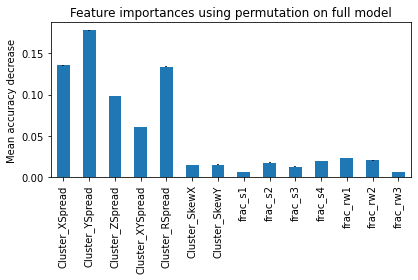

In [47]:
forest_importances = pd.Series(perm.feature_importances_, index=variablesTrain[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=perm.feature_importances_std_, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.savefig('Plots_presentation_PlusbeamHalo/importance_NN.png', dpi = 600)
plt.show()
